In [ ]:
import json
import requests

In [ ]:
response = requests.get("https://jsonplaceholder.typicode.com/users")
users_data=json.loads(response.text)
print(users_data)

[{'id': 1, 'name': 'Leanne Graham', 'username': 'Bret', 'email': 'Sincere@april.biz', 'address': {'street': 'Kulas Light', 'suite': 'Apt. 556', 'city': 'Gwenborough', 'zipcode': '92998-3874', 'geo': {'lat': '-37.3159', 'lng': '81.1496'}}, 'phone': '1-770-736-8031 x56442', 'website': 'hildegard.org', 'company': {'name': 'Romaguera-Crona', 'catchPhrase': 'Multi-layered client-server neural-net', 'bs': 'harness real-time e-markets'}}, {'id': 2, 'name': 'Ervin Howell', 'username': 'Antonette', 'email': 'Shanna@melissa.tv', 'address': {'street': 'Victor Plains', 'suite': 'Suite 879', 'city': 'Wisokyburgh', 'zipcode': '90566-7771', 'geo': {'lat': '-43.9509', 'lng': '-34.4618'}}, 'phone': '010-692-6593 x09125', 'website': 'anastasia.net', 'company': {'name': 'Deckow-Crist', 'catchPhrase': 'Proactive didactic contingency', 'bs': 'synergize scalable supply-chains'}}, {'id': 3, 'name': 'Clementine Bauch', 'username': 'Samantha', 'email': 'Nathan@yesenia.net', 'address': {'street': 'Douglas Exten

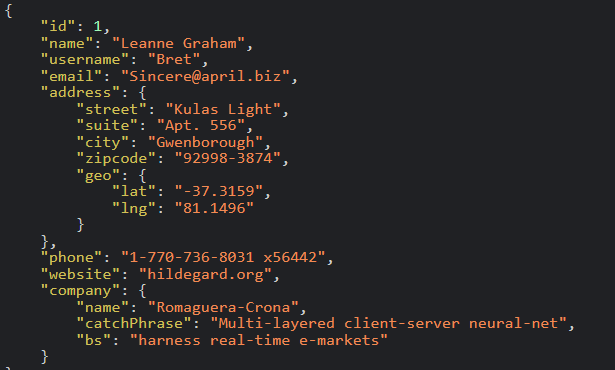

In [ ]:
import pandas as pd
lat=[]
lng=[]
name=[]
for info in users_data:
  lat.append(info["address"]["geo"]["lat"])
  lng.append(info["address"]["geo"]["lng"])
  name.append(info["name"])
df = pd.DataFrame(list(zip(name,lat, lng)),columns =['Name','Latitude', 'Longitude'])
print(df)


                       Name  Latitude  Longitude
0             Leanne Graham  -37.3159    81.1496
1              Ervin Howell  -43.9509   -34.4618
2          Clementine Bauch  -68.6102   -47.0653
3          Patricia Lebsack   29.4572  -164.2990
4          Chelsey Dietrich  -31.8129    62.5342
5      Mrs. Dennis Schulist  -71.4197    71.7478
6           Kurtis Weissnat   24.8918    21.8984
7  Nicholas Runolfsdottir V  -14.3990  -120.7677
8           Glenna Reichert   24.6463  -168.8889
9        Clementina DuBuque  -38.2386    57.2232


<ipython-input-28-a8dc03501c3a>:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



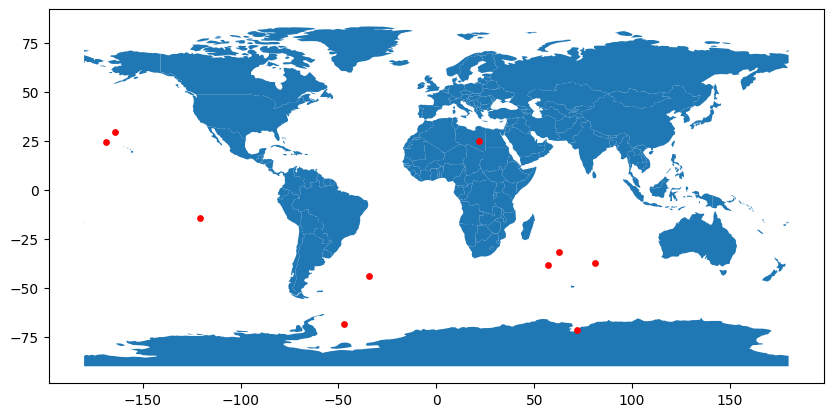

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [ ]:
import plotly.express as px
import pandas as pd
fig = px.scatter_geo(df,lat='Latitude',lon='Longitude', hover_name="Name")
fig.update_layout(title = 'Location of user', title_x=0.5)
fig.show()